In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

from utils import open_json

In [2]:
from data import *

Size of dataframe 0 is (64185, 9)
Size of dataframe 1 is (63204, 9)
Size of dataframe 2 is (48597, 9)
Size of dataframe 3 is (64454, 9)
April_8 data has been read
Size of dataframe 0 is (65571, 9)
Size of dataframe 1 is (64568, 9)
Size of dataframe 2 is (65350, 9)
Size of dataframe 3 is (66627, 9)
April_9 data has been read
Size of dataframe 0 is (65571, 9)
Size of dataframe 1 is (64568, 9)
Size of dataframe 2 is (65350, 9)
Size of dataframe 3 is (66627, 9)
April_10 data has been read
Size of dataframe 0 is (49762, 9)
Size of dataframe 1 is (61376, 9)
Size of dataframe 2 is (59725, 9)
Size of dataframe 3 is (61151, 9)
April_11 data has been read


In [3]:
def plot_acf_plots(df, headers, use_diff, file_name = None):

    plot_size = (2,3)

    fig, axs = plt.subplots(plot_size[0], plot_size[1], figsize=(plot_size[1] * 3.4 + 0.1 * plot_size[1] , plot_size[0] * 3.4 + 0.1 * plot_size[0]))
    
    df_in = df

    if use_diff:
        df_s = df_in.iloc[:, 1:].apply(pd.to_numeric).diff()
        df_in = pd.concat([df_in.iloc[1:, 0:1], df_s.iloc[1:, :]], axis=1)
        df_in = df_in.dropna(axis=1, how="all")

    i = 0
    for j in range(plot_size[0]):
        for k in range(plot_size[1]):
            
            curr_axs = axs[j, k]
            plot_acf(df_in.iloc[:, i+1:i+2].values, lags=50, ax=curr_axs)
            curr_axs.set_title(str(headers[i]))
            if j == 1:
                curr_axs.set_xlabel('Lag')
            if j == 0 and plot_size[0] == 1:
                curr_axs.set_ylabel('Correlation')
            elif k == 0 and plot_size[0] != 1: 
                curr_axs.set_ylabel('Correlation')
            i += 1
        
    if file_name != None:
        plt.savefig(file_name, bbox_inches="tight")

    plt.show()

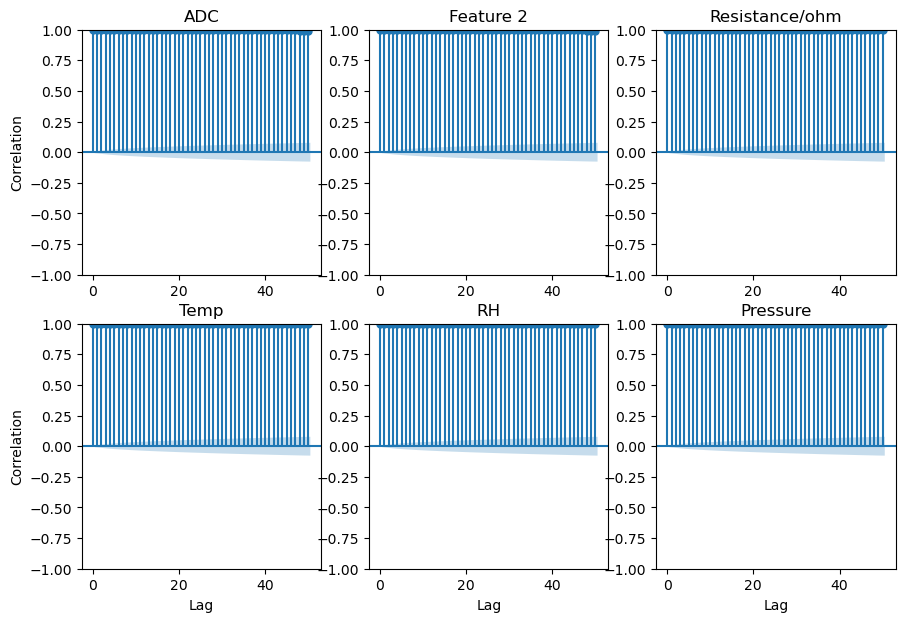

In [4]:
df48 = DATA_DICT[DATES[0]][0][0]

plot_acf_plots(df48, COLUMNS, False, "acf_4_8_before_diff.png")

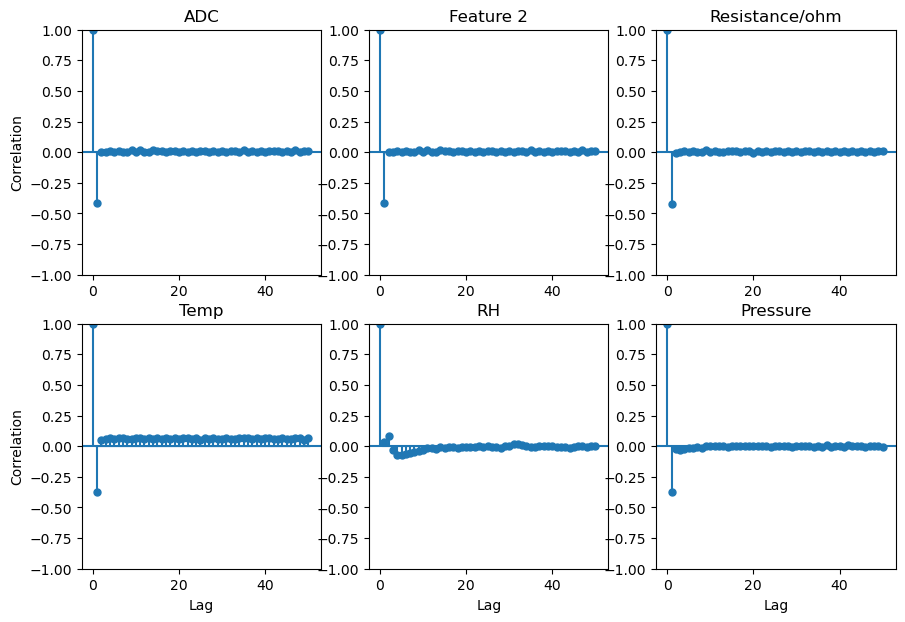

In [5]:
plot_acf_plots(df48, COLUMNS, True, "acf_4_8_after_diff.png")

In [6]:
def carry_out_ttest_ind(X_data, y_data):
    X_not_occur = X_data[y_data == 0]
    X_occur = X_data[y_data == 1]
    X_o = X_occur[:, 0:1, :].reshape(X_occur.shape[0], X_occur.shape[2])
    X_n = X_not_occur[:, 0:1, :].reshape(X_not_occur.shape[0], X_not_occur.shape[2])
    return stats.ttest_ind(X_o, X_n)

def generate_latex_table(headers, data):
    textabular = f"l|{'r'*len(headers)}"
    texheader = " & " + " & ".join(headers) + "\\\\"
    texdata = "\\hline\n"
    for label in data:
        if label == "z":
            texdata += "\\hline\n"
        texdata += f"{label} & {' & '.join(map(str,data[label]))} \\\\\n"

    print("\\begin{tabular}{"+textabular+"}")
    print(texheader)
    print(texdata,end="")
    print("\\end{tabular}")

In [7]:
result = dict()
X_data_all = None
y_data_all = None
for d_ind in range(4):
    _, _, _, _, _, _, X_data, y_data = preprocess_one_day_data(
        d_ind, WINDOW_SIZE, VALID_PER, TEST_PER, include_control = False, use_diff= True)
    if d_ind == 0:
        X_data_all = X_data
        y_data_all = y_data
    else:
        X_data_all = np.append(X_data_all, X_data, axis=0)
        y_data_all = np.append(y_data_all, y_data, axis=0)
    result[DATES[d_ind].replace("_", " ")] = np.round(carry_out_ttest_ind(X_data, y_data).pvalue, 5)
result["All"] = np.round(carry_out_ttest_ind(X_data_all, y_data_all).pvalue, 5)

In [8]:
generate_latex_table(COLUMNS, result)

\begin{tabular}{l|rrrrrr}
 & ADC & Feature 2 & Resistance/ohm & Temp & RH & Pressure\\
\hline
April 8 & 0.16701 & 0.16691 & 0.1916 & 0.00165 & 0.79254 & 0.96624 \\
April 9 & 0.75966 & 0.7596 & 0.81061 & 0.83857 & 0.64777 & 0.44253 \\
April 10 & 0.70274 & 0.7025 & 0.70984 & 0.25369 & 0.7582 & 0.61735 \\
April 11 & 0.90364 & 0.69379 & 0.75516 & 0.00041 & 0.84323 & 0.51681 \\
All & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\end{tabular}
